##  INTRODUÇÃO #

Projeto desenvolvido no capítulo 10 da  -  Formação Cientista de Dados -  do Curso Big Data Real-Time Analytics com Python e Spark 

Link da Plataforma de Ensino  : https://www.datascienceacademy.com.br/

### Objetivo do Projeto e Carga das Bibliotecas ###

Mini - Projeto 2 :

A empresa gostaria de aumentar as vendas, mas o orçamento permite investir somente no web site ou na app neste momento. 

O objetivo é melhorar a experiência do cliente durante a navegação no  sistema,  aumentando  o  tempo  logado,  aumentando  o  engajamento  e, consequentemente, aumentando as vendas.


Você foi contratado para ajudar a empresa a tomar essa decisão. 



In [ ]:
# Carregando os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore',category = FutureWarning)


In [ ]:
# Carrega o dataset
dados = pd.read_csv('/content/dataset.csv')

In [ ]:
# Shape
dados.shape

(500, 5)

In [ ]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [ ]:
# Amostra
dados.sample(10)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
192,2.652158,34.338729,10.716355,38.307204,426.775216
137,3.871003,32.461212,13.291143,38.633626,543.340166
42,2.494544,32.387976,13.148726,36.619957,470.452733
363,3.229451,33.674027,12.968893,37.333107,542.412477
446,3.982462,31.673915,12.329147,37.074371,475.725068
499,2.905238,33.606851,12.214074,37.198428,479.247417
106,3.462299,32.772610,13.276313,36.600777,540.263400
185,1.443515,32.115119,11.919242,39.294043,350.058200
491,4.301996,33.811733,11.186809,36.298893,535.321610
480,4.027814,33.552108,11.120871,36.808376,521.195311


## I. ANÁLISE EXPLORATÓRIA DOS DADOS##

In [ ]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [ ]:
# Correlação (tabela)
dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


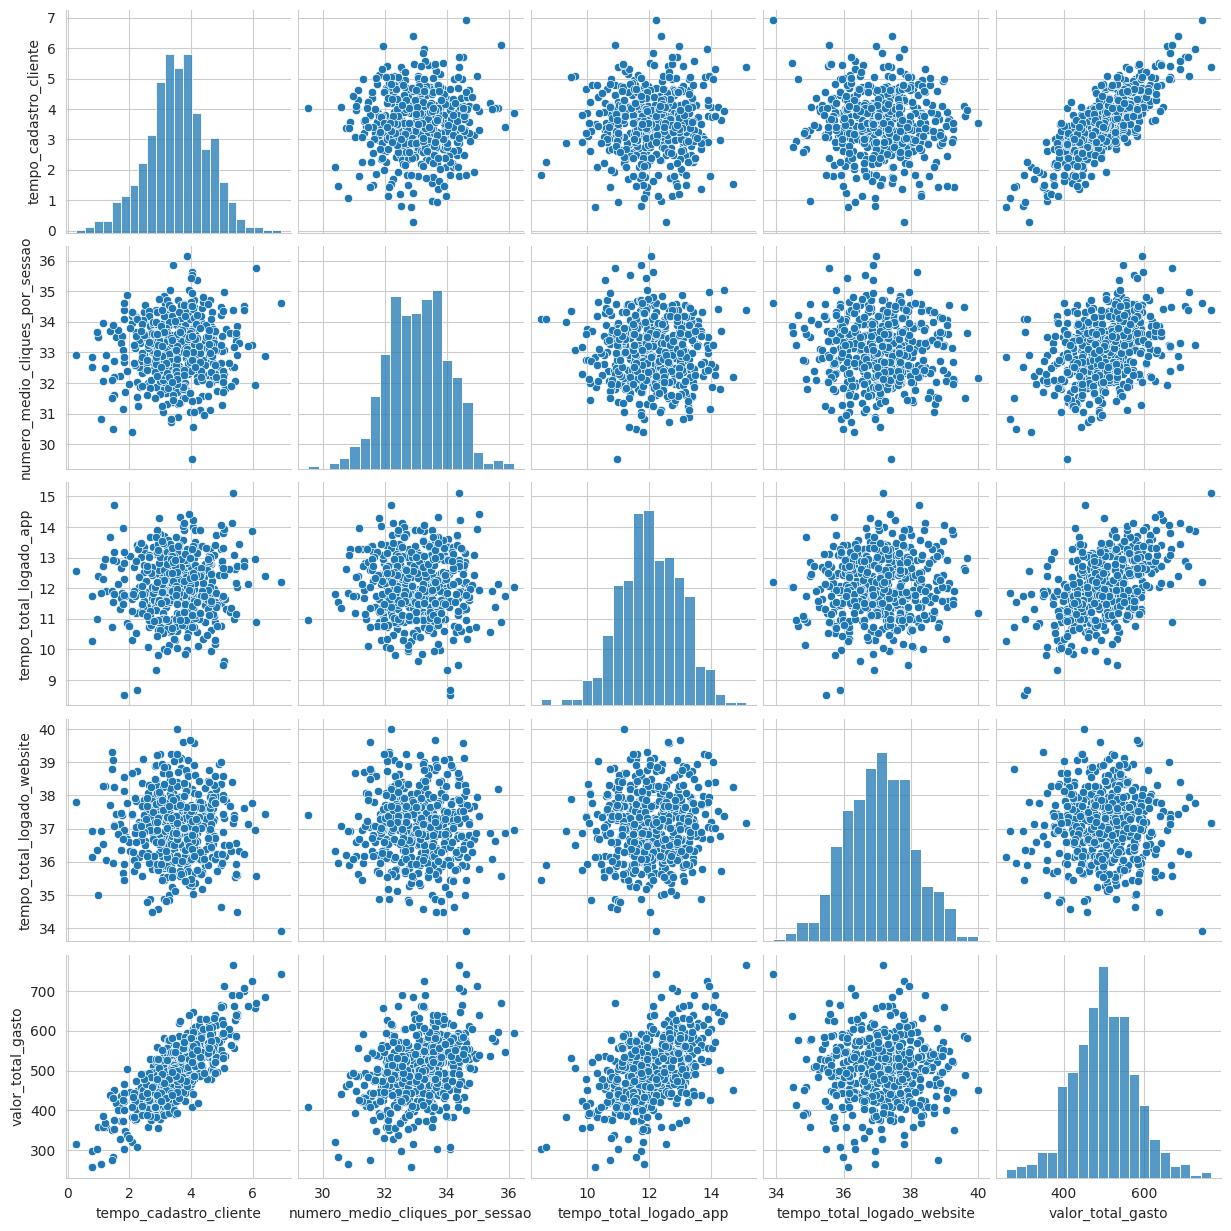

In [ ]:
# Correlação Visual
sns.pairplot(dados);

### Análise 1 - Relação Entre Tempo no Web Site e Valor Gasto ##

<Figure size 1800x1200 with 0 Axes>

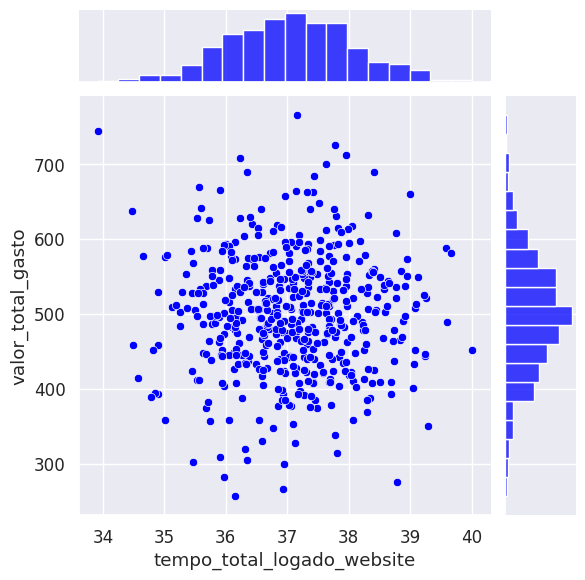

In [ ]:
# plot
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,
              x = 'tempo_total_logado_website',
              y = 'valor_total_gasto',
              color = 'blue');

Observando os histogramas, podemos ver que os dados estão normalmente distribuídos (seguem uma distribuição normal).

Observando o gráfico de dispersão, não parece haver correlação entre as duas variáveis. Vamos calcular o coeficiente de correlação entre elas.

In [ ]:
# Correlação
dados[['valor_total_gasto','tempo_total_logado_website']].corr()

,valor_total_gasto,tempo_total_logado_website
valor_total_gasto,1.000000,-0.002641
tempo_total_logado_website,-0.002641,1.000000


Não parece haver correlação entre tempo total logado website e o valor total gasto.

### Análise 2 - Relação Entre Tempo na APP e Valor Gasto ##

<Figure size 1800x1200 with 0 Axes>

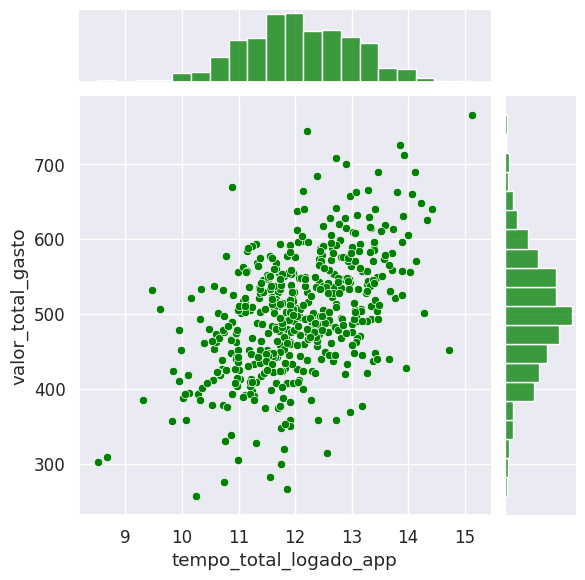

In [ ]:
# plot
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,
              x = 'tempo_total_logado_app',
              y = 'valor_total_gasto',
              color = 'green');

Observando os histogramas, podemos ver que os dados estão normalmente distribuídos. (seguem uma distribuição normal)

Observando o gráfico de dispersão, parece haver uma correlação positiva entre as duas variáveis. Vamos confirmar calculando o coeficiente de correlação entre elas.

In [ ]:
dados[['valor_total_gasto','tempo_total_logado_app']].corr()

,valor_total_gasto,tempo_total_logado_app
valor_total_gasto,1.000000,0.499328
tempo_total_logado_app,0.499328,1.000000


Os dados tem uma correlação positivamente moderada. Podemos deduzir que o valor gasto mensalmente tende a aumentar se o cliente passar mais tempo logado na app.

### Análise 3 - Relação entre Tempo na APP e Tempo de Cadastro ##



In [ ]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

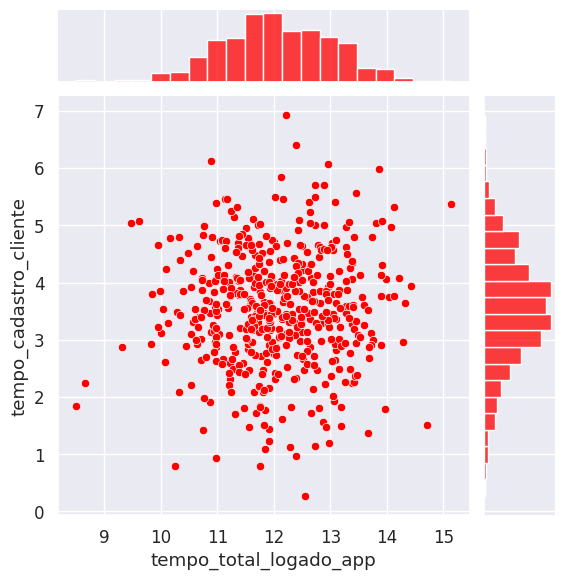

In [ ]:
plt.figure (figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,
              x = "tempo_total_logado_app",
              y = 'tempo_cadastro_cliente',
              color = 'red')

Observando os histogramas, podemos ver que os dados estão normalmente distribuídos (seguem uma distribuição normal)

A partir do gráfico de dispersão podemos ver que os dados são muito densos no meio do gráfico, não havendo uma correlação clara. Podemos deduzir que são muitos clientes que são membros há 3-4 anos e gastam aproximadamente 11,5 a 12,5 na app.

In [ ]:
# Correlação
dados[['tempo_cadastro_cliente','tempo_total_logado_app']].corr()

,tempo_cadastro_cliente,tempo_total_logado_app
tempo_cadastro_cliente,1.000000,0.029143
tempo_total_logado_app,0.029143,1.000000


### Análise 04 - Relação entre Tempo de Cadastro e Valor Gasto ##

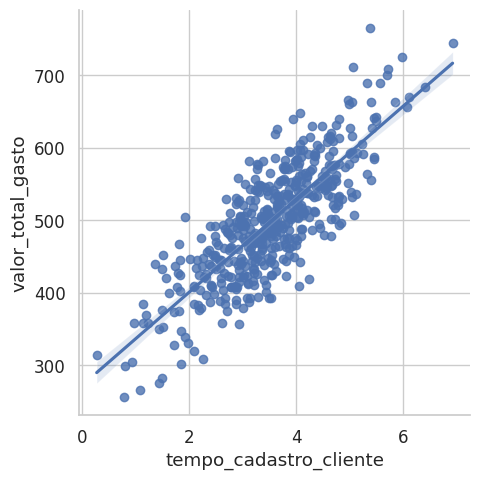

In [ ]:
# plot
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(y = 'valor_total_gasto', x = 'tempo_cadastro_cliente',data = dados)

In [ ]:
# Correlação
dados[['valor_total_gasto','tempo_cadastro_cliente']].corr()

,valor_total_gasto,tempo_cadastro_cliente
valor_total_gasto,1.000000,0.809084
tempo_cadastro_cliente,0.809084,1.000000


A partir do Implot e de coeficiente de correlação, podemos ver que o tempo de cadastro e o valor total gasto tem uma forte correlação positiva, ou seja, á medida que o cliente se torna mais antigo (mais tempo de cadastro), o valor total gasto por cliente aumenta.

Outra coisa a se notar é que a sombra ao redor da linha é muito fina, o que significa que o erro entre a estimativa (linha) e os pontos de dados são relativamente pequenos.


### Análise 5 : Relação entre Tempo Logado no App e Tempo Logado no Web Site ##

<Figure size 1200x1000 with 0 Axes>

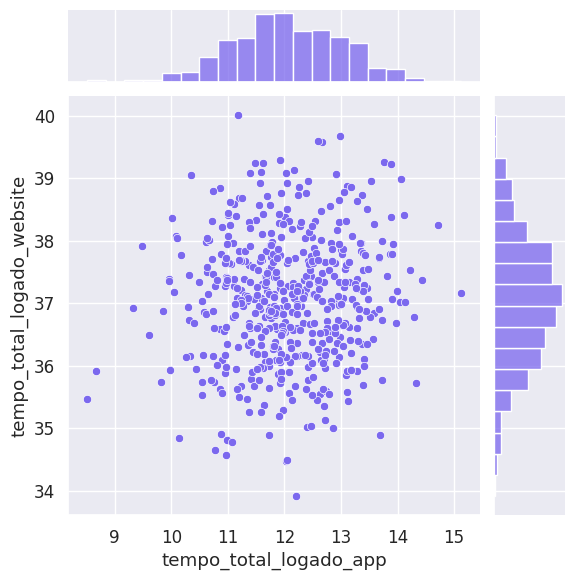

In [ ]:
# plot
plt.figure(figsize = (12,10))
sns.set(font_scale=1.1)
sns.jointplot(dados,
              x = 'tempo_total_logado_app',
              y = 'tempo_total_logado_website',
              color = 'MediumSlateBlue');


Não detectamos problemas críticos e podemos seguir adiante. Vamos manter a váriavel preditora com baixa correlação e validar essa relação com o modelo alvo no modelo final.


In [ ]:
dados[['tempo_total_logado_website','tempo_total_logado_app']].corr()

,tempo_total_logado_website,tempo_total_logado_app
tempo_total_logado_website,1.000000,0.082388
tempo_total_logado_app,0.082388,1.000000


## II. PRÉ- PROCESSAMENTO DOS DADOS PARA CONSTRUÇÃO DE MODELOS DE MACHINE LEARNING ##

In [ ]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [ ]:
# Variáveis de Entrada(preditoras)
X = dados[['tempo_cadastro_cliente',
           'numero_medio_cliques_por_sessao',
           'tempo_total_logado_app',
           'tempo_total_logado_website']]

In [ ]:
# Variável de saída(alvo ou target)
y = dados ['valor_total_gasto']

In [ ]:
# Divisão em dados de treino e dados de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y , test_size = 0.3, random_state = 101)

In [ ]:
len(X_treino)

350

In [ ]:
len(y_teste)

150

### Padronização ###

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_treino)

StandardScaler()

In [ ]:
X_treino = scaler.transform(X_treino)

In [ ]:
X_teste = scaler.transform(X_teste)

In [ ]:
X_treino[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [ ]:
X_teste[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

## III. CONSTRUÇÃO, TREINAMENTO E AVALIAÇÃO DO MODELO 1 COM REGRESSÃO LINEAR (Benchmark)##


### Criação e Treinamento do Modelo ###

In [ ]:
# Cria o modelo
modelo_v1 = LinearRegression()

In [ ]:
# Treinamento
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [ ]:
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [ ]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1.coef_,X.columns, columns = ['Coeficiente'] )
df_coef

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


### Avaliação do Modelo ###




In [ ]:
# Previsões com dados de teste
pred_v1 = modelo_v1.predict(X_teste)

In [ ]:
# Imprime as 10 primeiras previsões
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

Text(0, 0.5, 'Valor Previsto de Y')

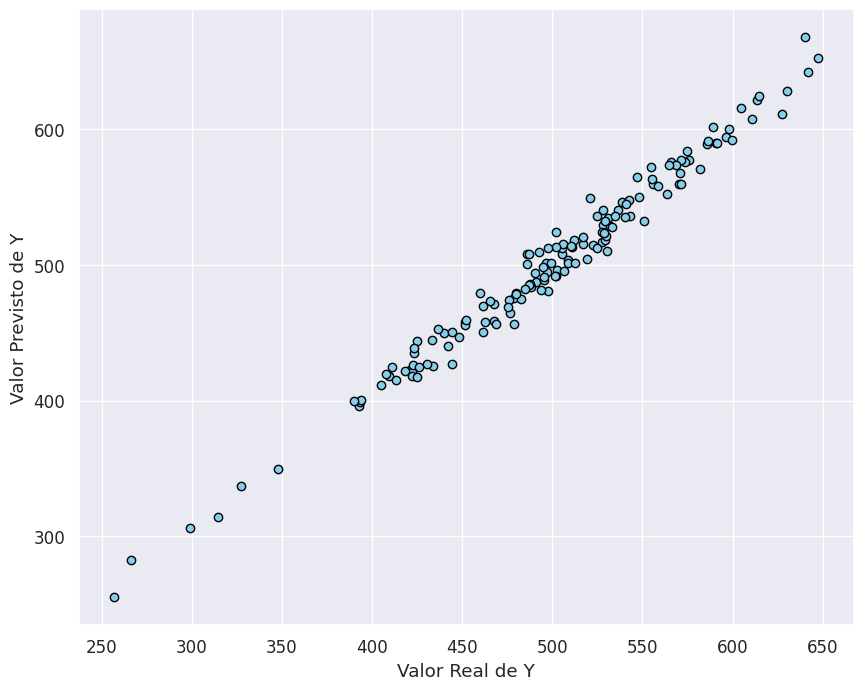

In [ ]:
# plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste,
            y = pred_v1,
            color = 'skyblue',
            edgecolors = 'black') 
plt.xlabel('Valor Real de Y')
plt.ylabel ('Valor Previsto de Y')

In [ ]:
# Valor medio gasto pelos clientes
dados['valor_total_gasto'].mean()

499.31403826080003

In [ ]:
# Valor mínimo
dados['valor_total_gasto'].min()

256.6705823

In [ ]:
# Valor máximo
dados['valor_total_gasto'].max()

765.5184619

### Métricas_V1 ###


*   MAE - Erro Médio Absoluto
*   MSE - Erro Quadrático Médio
*   RMSE - Raiz Quadrada do Erro Quadrático Médio
*   R2   - Coeficiente R2
*   Variância Explicada




In [ ]:
# MAE - Erro Médio
mean_absolute_error(y_teste, pred_v1)

7.762418645778977

>> O MAE prevê que, em média, as previsões do nosso modelo (de valores de gastos) estão erradas em aproxidamente 7,76 reais , o que é um valor pequeno comparado ao valor médio gasto por cliente.

In [ ]:
# MSE - Erro Quadrático Médio
mean_squared_error(y_teste,pred_v1)

94.95654308438658

In [ ]:
# RMSE - Raiz Quadrada do Erro Quadrático Médio
np.sqrt(mean_squared_error( y_teste, pred_v1))

9.744564797074654

> > O RMSE prevê que, em média, as previsões do nosso modelo (de valores de gastos) estão erradas em aproximadamente 9,74 reais que é um valor pequeno comparado ao valor médio gasto por cliente.

In [ ]:
# Coeficiente R2
r2_score(y_teste, pred_v1)

0.9813622791776302

In [ ]:
# Variância Explicada
explained_variance_score (y_teste,pred_v1)

0.981744918342864

>> Nosso modelo é capaz de explica 98% da variância dos dados,  o que é excelente. 
>>
 >> O coeficiente R2 de 98% e as outras métricas, demonstram que este é um modelo muito bom.


 ### Resíduos ###

<ipython-input-47-cf4c9aa63efb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_teste - pred_v1),


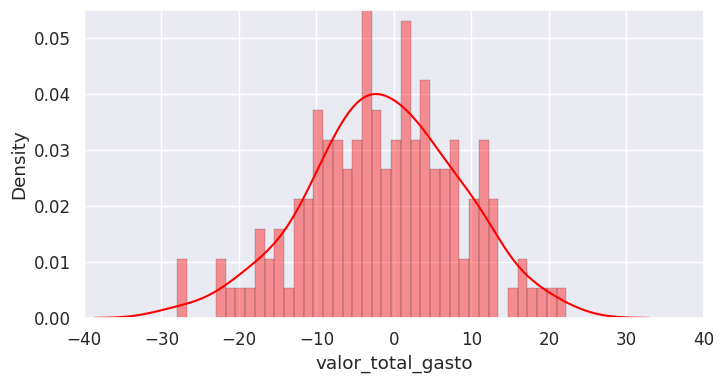

In [ ]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v1),
            bins = 40,
            color = "red",
            hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set (ylim = (0,0.055));

## IV. CONSTRUÇÃO E TREINAMENTO E AVALIAÇÃO DO MODELO 2 COM REGRESSÃO RIDGE 


### Criação e Treinamento ##

In [ ]:
# Cria o modelo
modelo_v2 = Ridge(alpha = 1.0)

In [ ]:
# Treinamento
modelo_v2.fit (X_treino, y_treino)

Ridge()

In [ ]:
print('Coeficientes: \n ',modelo_v2.coef_)

Coeficientes: 
  [63.57245999 26.17198131 38.46758178  0.68013543]


In [ ]:
# Coeficientes das Variáveis Preditoras
df_coef = pd.DataFrame(modelo_v2.coef_ , X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.572460
numero_medio_cliques_por_sessao,26.171981
tempo_total_logado_app,38.467582
tempo_total_logado_website,0.680135


### Avaliação do modelo ###

In [ ]:
# Previsões com dados de teste
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

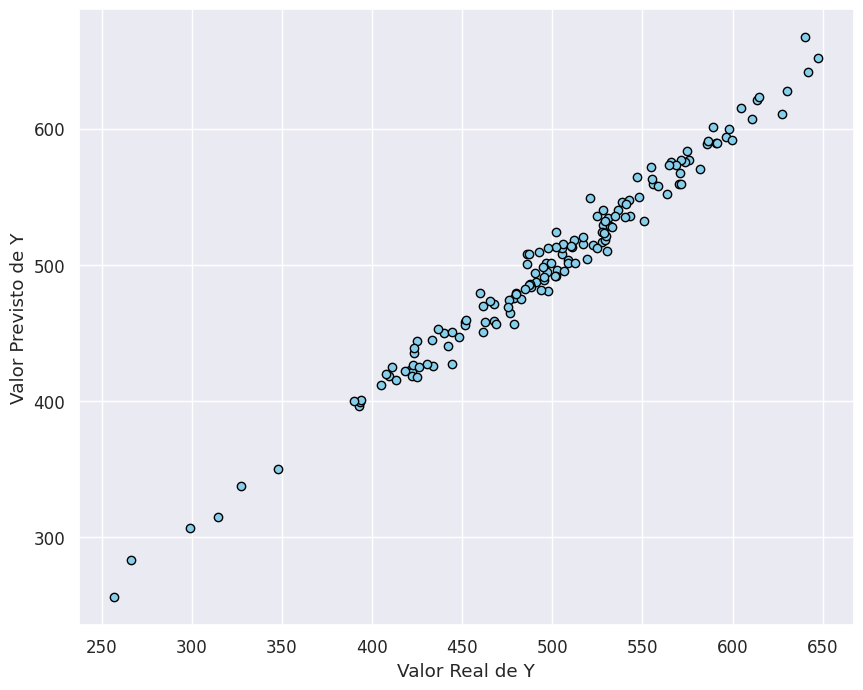

In [ ]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter (x = y_teste, y = pred_v2,color = 'skyblue',edgecolors = 'black')
plt.xlabel ('Valor Real de Y')
plt.ylabel ('Valor Previsto de Y');

### Métricas_V2

*   MAE - Erro Médio Absoluto
*   MSE - Erro Quadrático Médio
*   RMSE - Raiz Quadrada do Erro Quadrático Médio
*   R2   - Coeficiente R2
*   Variância Explicada



In [ ]:
# MAE 
mean_absolute_error(y_teste, pred_v2)

7.764151148981964

In [ ]:
# MSE 
mean_squared_error(y_teste, pred_v2)

94.93731602493466

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_teste,pred_v2))

9.7435781941202

In [ ]:
# Coeficiente R2
r2_score(y_teste,pred_v2)

0.981366052994101

In [ ]:
# Variância Explicada
explained_variance_score(y_teste,pred_v2)

0.9817472659016085

### Resíduos

<ipython-input-59-ed7f7e8f0357>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_teste - pred_v2),


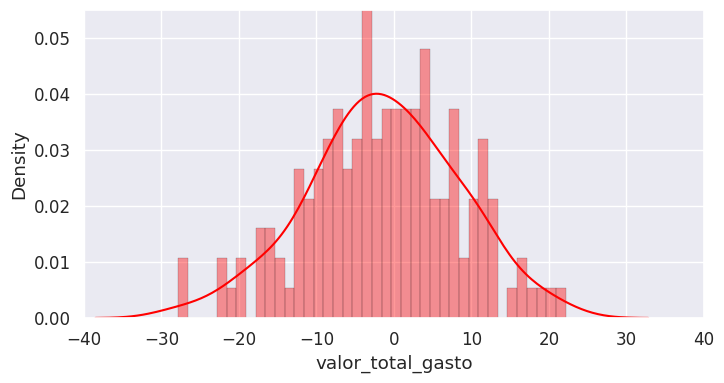

In [ ]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v2),
            bins = 40,
            color = "red",
            hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set (ylim = (0,0.055));

## V. CONSTRUÇÃO E TREINAMENTO E AVALIAÇÃO DO MODELO 3 COM REGRESSÃO LASSO ##

### Criação e Treinamento do Modelo ###

In [ ]:
# Cria o modelo
modelo_v3 = Lasso(alpha =  1.0)

In [ ]:
# Treinamento 
modelo_v3.fit(X_treino, y_treino)

Lasso()

In [ ]:
print('Coeficientes : \n', modelo_v3.coef_)

Coeficientes : 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [ ]:
# Coeficientes
df_coef = pd.DataFrame (modelo_v3.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,62.863441
numero_medio_cliques_por_sessao,25.187472
tempo_total_logado_app,37.621492
tempo_total_logado_website,0.000000


### Avaliação do Modelo ###

In [ ]:
# Previsões com dados de Teste
pred_v3 = modelo_v3.predict(X_teste)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

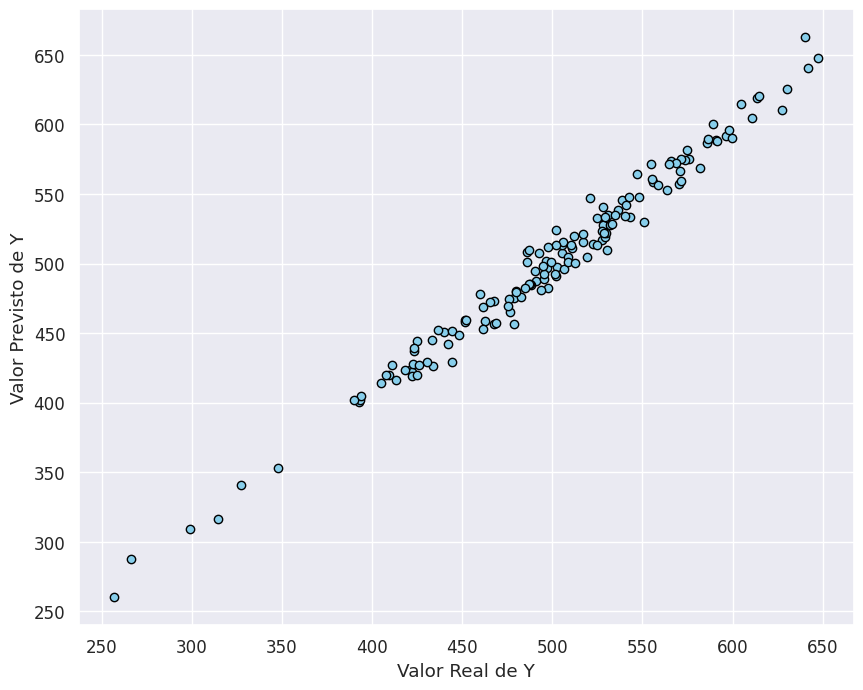

In [ ]:
# plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste,
            y = pred_v3,
            color = 'skyblue',
            edgecolors = 'black') 
plt.xlabel('Valor Real de Y')
plt.ylabel ('Valor Previsto de Y');

### Métricas_V3 ###


*   MAE - Erro Médio Absoluto
*   MSE - Erro Quadrático Médio
*   RMSE - Raiz Quadrada do Erro Quadrático Médio
*   R2   - Coeficiente R2
*   Variância Explicada


In [ ]:
# MAE
mean_absolute_error(y_teste,pred_v3)

7.7885046969510645

In [ ]:
# MSE
mean_squared_error(y_teste,pred_v3)

96.05606348970672

In [ ]:
#RMSE
np.sqrt(mean_squared_error(y_teste,pred_v3))

9.800819531534428

In [ ]:
# Coeficiente R2
r2_score(y_teste,pred_v3)

0.981146469358873

In [ ]:
explained_variance_score(y_teste,pred_v3)

0.9815600649101045

### Resíduos ###

<ipython-input-71-dee2a6368d3d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_teste - pred_v3),


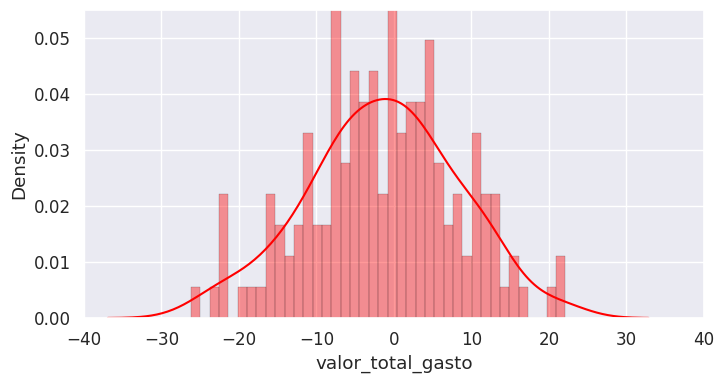

In [ ]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v3),
            bins = 40,
            color = "red",
            hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set (ylim = (0,0.055));

## VI . SELEÇÃO DO MODELO ##


O modelo 3 apresentou uma taxa de erro (RMSE) levamente maior e pode ser descartado. Os modelos 1 e 2 ficaram muito próximos e nesse caso devemos escolher o modelo mais simples, que é o modelo 1.

In [ ]:
dados.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


## VII . CONCLUSÃO E INTERPRETAÇÃO DOS COEFICIENTES ##

In [ ]:
# Coeficientes
df_coef_final= pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef_final

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


#### Interpretação dos Coeficientes :  ###



*   Mantendo todos os recursos fixos, um aumento de 1 unidade no tempo de cadastro do cliente está associado a um aumento de R$63,74 no valor total gasto por cliente por mês.

*    Mantendo todos os recursos fixos, um aumento de 1 unidade no número médio de cliques por sessão está associado a um aumento de R$26,24 no valor total gasto por cliente por mês.



*    Mantendo todos os recursos fixos, um aumento de 1 unidade no tempo total logado na app  está associado a um aumento de R$38,57 no valor total gasto por cliente por mês.

*    Mantendo todos os recursos fixos, um aumento de 1 unidade no tempo total logado no web site está associado a um aumento de R$0,68 no valor total gasto por cliente por mês.



## CONCLUSÃO:


* Podemos ver que será mais lucratvo para empresa investir na atualização da sua app uma vez que o retorno será maior . 

* Além disso, é importante criar políticas para reterr o cliente por mais tempo, já que isso também leva ao aumento das vendas. A própria atualização da app será uma forma de reter o cliente por mais tempo.

* Não compensa, neste momento, investir na atualização do web site pois o retorno será mínimo.